In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14

# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
sample_freq = (62.5) * u.MHz # 62.5 MHz
dt = (1 / sample_freq).to(u.ns) # 16 ns

N_samples = 16000

sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

In [3]:
SSB_phased_plus_Im_X = np.loadtxt('SSB_phased_plus_Im_X.txt', dtype = np.int16) * scaling_factor
SSB_phased_plus_Re_X = np.loadtxt('SSB_phased_plus_Re_X.txt', dtype = np.int16) * scaling_factor

In [4]:
SSB_phased_minus_Im_X = np.loadtxt('SSB_phased_minus_Im_X.txt', dtype = np.int16) * scaling_factor
SSB_phased_minus_Re_X = np.loadtxt('SSB_phased_minus_Re_X.txt', dtype = np.int16) * scaling_factor

In [5]:
SSB_phased_plus_complex = SSB_phased_plus_Re_X + 1j*SSB_phased_plus_Im_X

In [6]:
SSB_phased_minus_complex = SSB_phased_minus_Re_X + 1j*SSB_phased_minus_Im_X

In [7]:
plus_fft, minus_fft = np.fft.fft(SSB_phased_plus_complex) / sampling_time , np.fft.fft(SSB_phased_minus_complex) / sampling_time

In [8]:
plus_power, minus_power = np.abs(plus_fft)**2 , np.abs(minus_fft)**2

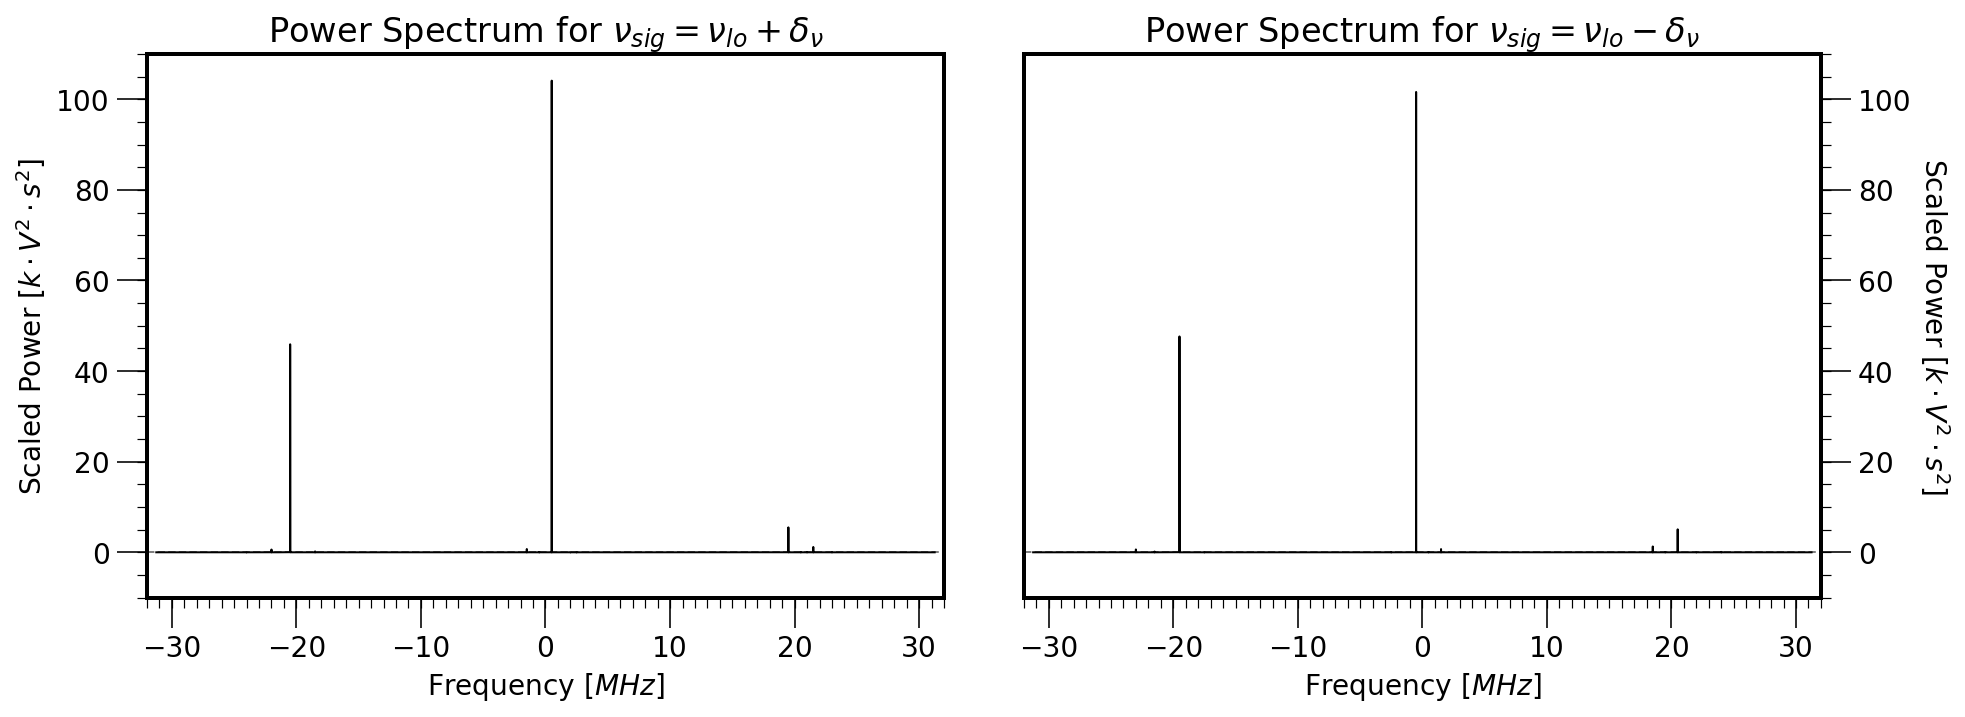

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

PLOT_SCALE = 1e12 / .7

axes[0].set_title(r'Power Spectrum for $\nu_{sig} = \nu_{lo} + \delta_\nu$')

axes[0].plot(np.fft.fftshift(freqs),
             np.fft.fftshift(plus_power) / PLOT_SCALE,
             color = 'black',
             linewidth = 1,
             label = r'$\nu_{sig} = \nu_{lo} + \delta_\nu$')
    
axes[1].set_title(r'Power Spectrum for $\nu_{sig} = \nu_{lo} - \delta_\nu$')

axes[1].plot(np.fft.fftshift(freqs),
             np.fft.fftshift(minus_power) / PLOT_SCALE,
             color = 'black',
             linewidth = 1,
             label = r'$\nu_{sig} = \nu_{lo} - \delta_\nu$')

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[0].set_ylabel(r'Scaled Power [$k \cdot V^2 \cdot s^2$]')
axes[1].set_ylabel(r'Scaled Power [$k \cdot V^2 \cdot s^2$]', rotation = 270, labelpad = 20)


for ax in axes:
    ax.set_xlabel('Frequency [$MHz$]')
    
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.tick_params(which='major', length = 15)
    ax.tick_params(which='minor', length = 5)
    ax.axhline(0, color = 'black', linewidth = 1, ls = '--', alpha = 0.5)
    ax.set_xlim(-32, 32)
    ax.set_ylim(-10, 110)
    
fig.subplots_adjust(wspace=0.1)
plt.show()
fig.savefig('power_plus_5_3_2.pdf')